In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataset
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

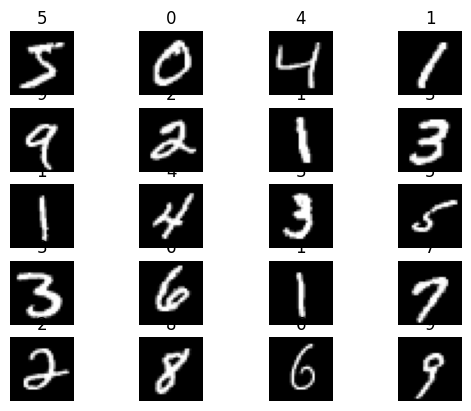

In [4]:
for i in range(20):
  ax=plt.subplot(5,4,i+1)
  ax.imshow(x_train[i],cmap='gray')
  ax.set_title(y_train[i])
  plt.axis('off')
plt.show

In [5]:
x_train=x_train/255
x_test=x_test/255
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
#cnn model
#sigmoid for binary classification(only 2 in output)
#relu is the simplest
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(filters=30,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))#1 is for gray scale and 3 for red scale
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=15,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 30)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 15)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 100)               3

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.1704 - accuracy: 0.9477 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0399 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0387 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0388 - val_accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0338 - val_accuracy

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9870


[0.045901793986558914, 0.9869999885559082]

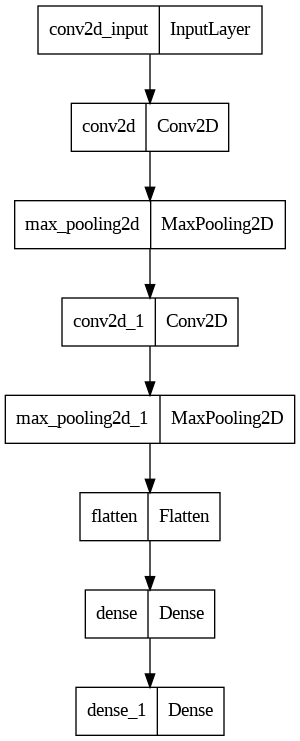

In [11]:
keras.utils.plot_model(model)

In [12]:
np.argmax(model.predict(x_test[9999].reshape(1,28,28,1)))

1/1 [==============================] - 0s 471ms/step


6

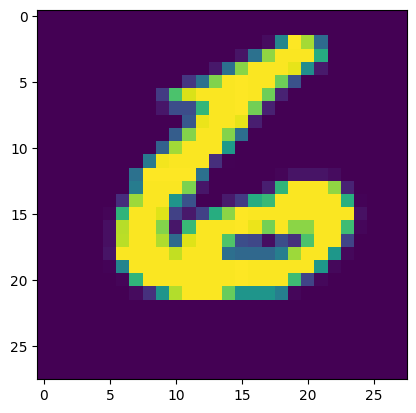

In [13]:
plt.imshow(x_test[9999])

#CIFAR10

In [2]:
#cifar10
(cx_train,cy_train),(cx_test,cy_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
print(cx_train.shape)
print(cy_train.shape)
print(cx_test.shape)
print(cy_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

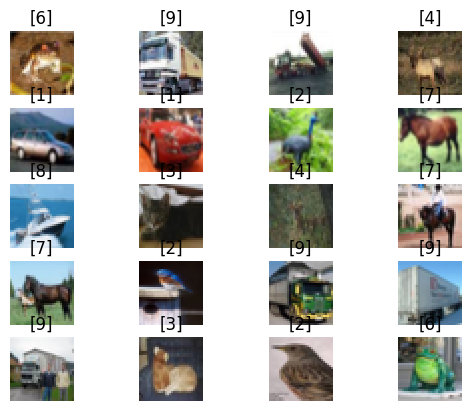

In [4]:
for i in range(20):
  ax=plt.subplot(5,4,i+1)
  ax.imshow(cx_train[i])
  ax.set_title(cy_train[i])
  plt.axis('off')
plt.show

In [5]:
cx_train=cx_train/255
cx_test=cx_test/255
print(cx_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
from keras.models import Sequential
cnn=Sequential()
cnn.add(Conv2D(filters=30,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=15,kernel_size=(3,3),activation='relu',padding="same"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

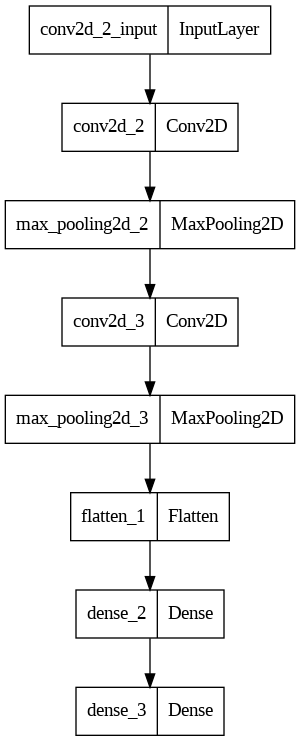

In [16]:
keras.utils.plot_model(cnn)

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 15)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [10]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
cnn.fit(cx_train,cy_train,epochs=17,batch_size=550)

Epoch 1/17
91/91 [==============================] - 1s 11ms/step - loss: 0.5837 - accuracy: 0.7982
Epoch 2/17
91/91 [==============================] - 1s 11ms/step - loss: 0.5769 - accuracy: 0.7994
Epoch 3/17
91/91 [==============================] - 1s 12ms/step - loss: 0.5727 - accuracy: 0.8011
Epoch 4/17
91/91 [==============================] - 1s 13ms/step - loss: 0.5653 - accuracy: 0.8036
Epoch 5/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5572 - accuracy: 0.8063
Epoch 6/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5467 - accuracy: 0.8112
Epoch 7/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5451 - accuracy: 0.8113
Epoch 8/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5443 - accuracy: 0.8107
Epoch 9/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5239 - accuracy: 0.8183
Epoch 10/17
91/91 [==============================] - 1s 10ms/step - loss: 0.5321 - accuracy: 0.8162
Epoch 11/

In [15]:
cnn.evaluate(cx_test,cy_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0440 - accuracy: 0.6805


[1.044037103652954, 0.6804999709129333]

In [24]:
#0=airplane,1=automobile,2=bird,3=cat,4=deer,5=dog,6=frog,7=horse,8=ship,9=truck}
cy_pred=np.argmax(cnn.predict(cx_test[1000].reshape(1,32,32,3)))
print(cy_pred)
if cy_pred==0:
  print("airplane")
elif cy_pred==1:
  print("automobile")
elif cy_pred==2:
  print("bird")
elif cy_pred==3:
  print("cat")
elif cy_pred==4:
  print("deer")
elif cy_pred==5:
  print("dog")
elif cy_pred==6:
  print("frog")
elif cy_pred==7:
  print("horse")
elif cy_pred==8:
  print("ship")
elif cy_pred==9:
  print("truck")

1/1 [==============================] - 0s 17ms/step
5
dog


Text(0.5, 1.0, '[5]')

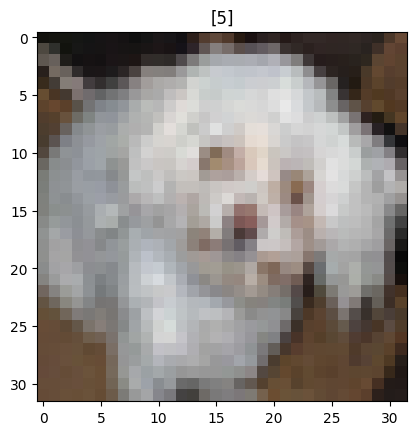

In [26]:
plt.imshow(cx_test[1000])
plt.title(cy_test[1000])

In [30]:
#0=airplane,1=automobile,2=bird,3=cat,4=deer,5=dog,6=frog,7=horse,8=ship,9=truck}
cy_pred=np.argmax(cnn.predict(cx_test[9990].reshape(1,32,32,3)))
print(cy_pred)
if cy_pred==0:
  print("airplane")
elif cy_pred==1:
  print("automobile")
elif cy_pred==2:
  print("bird")
elif cy_pred==3:
  print("cat")
elif cy_pred==4:
  print("deer")
elif cy_pred==5:
  print("dog")
elif cy_pred==6:
  print("frog")
elif cy_pred==7:
  print("horse")
elif cy_pred==8:
  print("ship")
elif cy_pred==9:
  print("truck")

1/1 [==============================] - 0s 24ms/step
7
horse


Text(0.5, 1.0, '[7]')

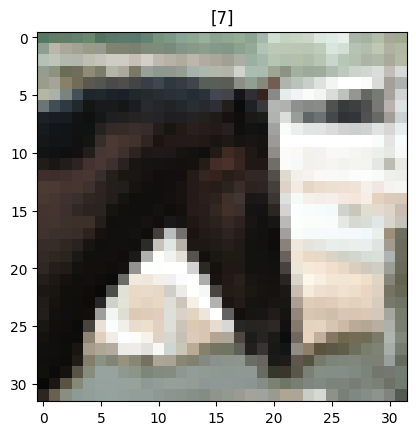

In [29]:
plt.imshow(cx_test[9990])
plt.title(cy_test[9990])